In [4]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [5]:
# create some data
mean_01 = np.array([0., 0.])
cov_01 = np.array([[1.0, 1.2], [1.2, 1.5]])

data = np.random.multivariate_normal(mean_01, cov_01, 800)
print data.shape
# print np.cov(data.T)

(800, 2)


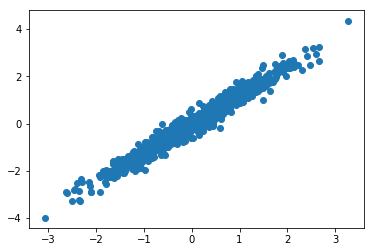

In [9]:
plt.figure(0)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [10]:
def pca(X, k=None):
    # set number of output dims
    if k is None:
        k = X.shape[1]
    
    # compute the covariance
    A = np.cov(X.T)
    
    # Compute the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(A)
    #Z = X.dot(W)
    return eig_val, eig_vec

In [11]:
lam, W = pca(data)
print lam.shape, W.shape

(2,) (2, 2)


In [12]:
print lam
print W

[0.02520557 2.42896523]
[[-0.77841317 -0.62775229]
 [ 0.62775229 -0.77841317]]


In [13]:
print np.cov(data.T)

[[0.97246219 1.17459872]
 [1.17459872 1.48170862]]


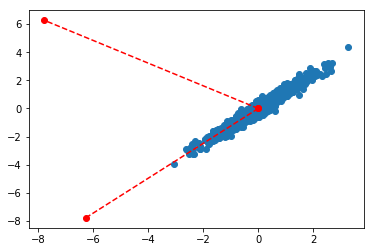

In [16]:
plt.figure(0)
plt.scatter(data[:, 0], data[:, 1])
plt.plot([0, 10*W[0, 0]], [0, 10*W[1, 0]], 'ro--')
plt.plot([0, 10*W[0, 1]], [0, 10*W[1, 1]], 'ro--')
plt.show()

In [17]:
Z = data.dot(W)
print Z.shape
print Z[:10]

(800, 2)
[[ 0.22153746  0.78429442]
 [-0.0193222   0.06921751]
 [ 0.2612031   0.69772904]
 [ 0.10287232  2.3478986 ]
 [-0.28413892 -0.24347745]
 [-0.00572128  0.54080125]
 [-0.1389826   0.99222113]
 [-0.18409169 -2.39912831]
 [-0.01215713 -0.92442735]
 [-0.06912012 -0.18240201]]


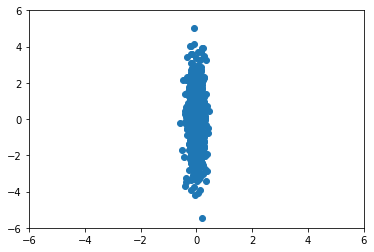

In [19]:
plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.scatter(Z[:, 0], Z[:, 1])
plt.show()

In [20]:
sigma = np.cov(Z.T)
print W.dot(sigma).dot(W.T)

[[0.97246219 1.17459872]
 [1.17459872 1.48170862]]


(800, 2)


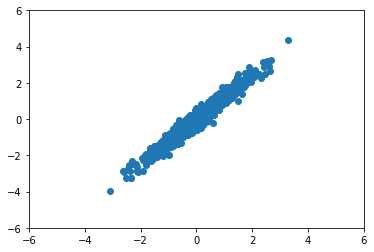

In [21]:
# Reconstructing the original data
D = Z.dot(W.T)
print D.shape

plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.scatter(D[:, 0], D[:, 1])
plt.show()

In [22]:
print np.cumsum(lam[::-1]/lam.sum())

[0.9897295 1.       ]


# PCA on MNIST

In [24]:
ds = pd.read_csv('/Users/tanish/Downloads/DATA/mnist/train.csv')
data = ds.values[:10000, 1:]
y = ds.values[:10000, 0]
print data.shape

(10000, 784)


/usr/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


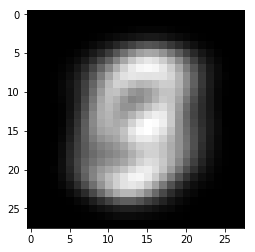

In [25]:
N = 1200
plt.grid("off")
plt.imshow(data[:].mean(axis=0).astype(np.uint8).reshape((28, 28)), cmap='gray')

In [26]:
A = np.cov(data.T)
print A.shape

(784, 784)


In [27]:
eig_vals, eig_vecs = np.linalg.eig(A)
print eig_vals.shape

(784,)


In [28]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix], eig_vecs[:, ix]]
    info.append(dx)
print len(info)

784


In [29]:
info = sorted(info, key=lambda z: z[0], reverse=True)

In [30]:
sorted_lambda = []
sorted_W = []

for ix in range(len(info)):
    sorted_lambda.append(info[ix][0])
    sorted_W.append(info[ix][1])

sorted_lambda = np.asarray(sorted_lambda)
sorted_W = np.asarray(sorted_W)

/usr/local/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


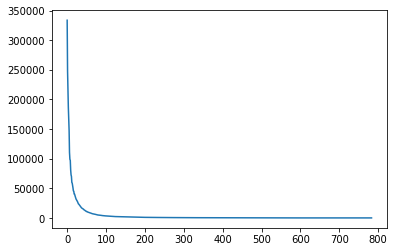

In [31]:
plt.plot(sorted_lambda)

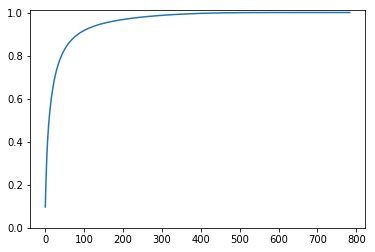

In [32]:
plt.figure(0)
plt.ylim(0, 1.01)
plt.plot(np.cumsum(sorted_lambda/sorted_lambda.sum()))
plt.show()

In [33]:
explained_variances_ratio = np.cumsum(sorted_lambda/sorted_lambda.sum())
print explained_variances_ratio[50]

(0.829710021349997+0j)


In [34]:
for ix in range(explained_variances_ratio.shape[0]):
    if explained_variances_ratio[ix] < 0.99:
        pass
    else:
        print ix
        break

326


In [35]:
k = 500
W = sorted_W[:, :k]
Z = data.dot(W)
print Z.shape

(10000, 500)


(10000, 784)


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


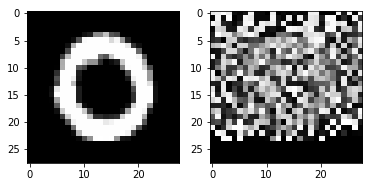

In [36]:
X_reconstruct = Z.dot(W.T).astype(np.uint8)
X_pos = (X_reconstruct>0)
X_new = X_reconstruct * X_pos

print X_reconstruct.shape

# print np.asarray(X_reconstruct[0], dtype='uint8')
N = 1

plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(data[N].astype(np.uint8).reshape((28, 28)), cmap='gray')
plt.subplot(1, 2, 2)
plt.grid("off")
plt.imshow(X_new[N].astype(np.uint8).reshape((28, 28)), cmap='gray')

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)

X_ = pca.fit_transform(data)
print X_.shape

(10000, 2)


In [39]:
X_re = pca.inverse_transform(X_)
X_re.shape

(10000, 784)

294.0429352683558


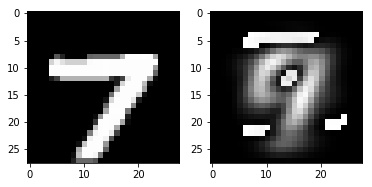

In [40]:
N = np.random.randint(0, high=10000)
plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(data[N].reshape((28, 28)), cmap='gray')

plt.subplot(1, 2, 2)
plt.grid("off")

im = X_re[N]
img = im - im.min()
print img.max()
img = img

plt.imshow(im.astype(np.uint8).reshape((28, 28)), cmap='gray')

plt.show()

In [41]:
X_re.shape

(10000, 784)

In [ ]:
colors = ['red', 'green', 'blue', 'black', 'pink', 'yellow', 'cyan', 'magenta', 'violet', 'brown', 'orange']
plt.figure(0)
for ix in range(2000):
    plt.scatter(X_[ix, 0], X_[ix, 1], color=colors[y[ix]])
plt.show()